## Titanic data set obtained from Kaggle

In [14]:
import pandas as pd
from pandas import Series,DataFrame

In [15]:
titanic_df = pd.read_csv("train.csv")

In [16]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [17]:
# Taking q quick information on the data
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


## Questions to address

1) who were the passengers?

2) what deck were the passengers in and their relation to class?

3) where did the passengers come from?

4) Number of people alone and with family

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

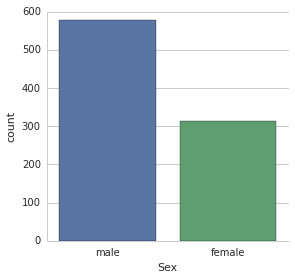

In [26]:
# who were the passengers ? this can be visualised using seaborn 
sns.factorplot('Sex',data=titanic_df,kind='count')

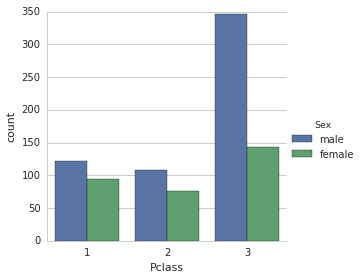

In [31]:
sns.factorplot('Pclass',data=titanic_df,kind = 'count',hue='Sex')

From the above plot we can see that the number of males in the 3rd class where much more than the number of males in any other class

#### To know the difference between male female and children we define a function below and define a child to be below 16 years of age i.e the function will return a child if the age is less than 16 only above that age they are categorized as male and female

In [36]:
def male_female_child(passenger):
    age,sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [37]:
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [39]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C,child


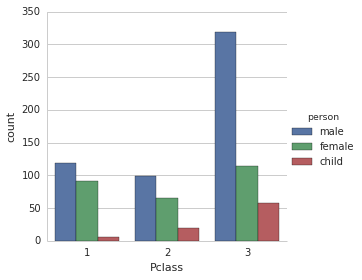

In [42]:
sns.factorplot('Pclass',data =titanic_df,kind='count',hue='person')

#### The above visualization clearly shows the fact that the number of children (whose age is less than 16) in the first class is very low as compared to the other classes.

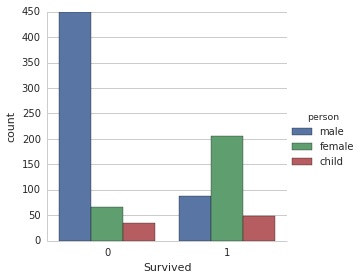

In [53]:
sns.factorplot('Survived',data =titanic_df,kind='count',hue='person')

#### The above visualization suggests that the number of males who survived are very low. Here 0 indicates not survived and 1 indicates survived

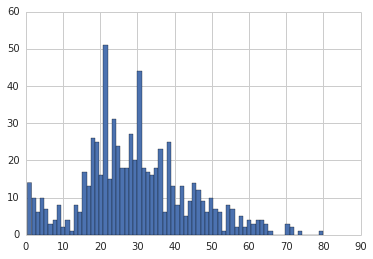

In [54]:
## the distribution of age of people is shown below
titanic_df['Age'].hist(bins=70)

In [66]:
# the mean age of the people 
titanic_df['Age'].mean()

29.69911764705882

In [71]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

### Below we visualise the distribution of various aspects such as age and person defined above

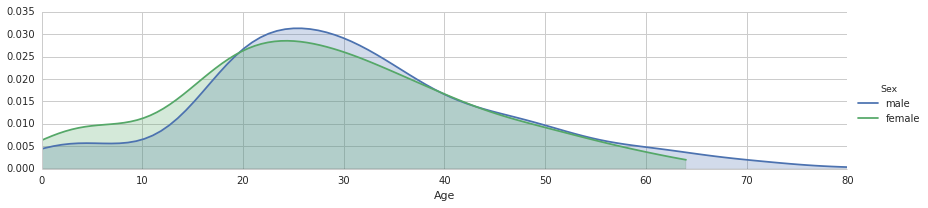

In [72]:
fig = sns.FacetGrid(titanic_df,hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

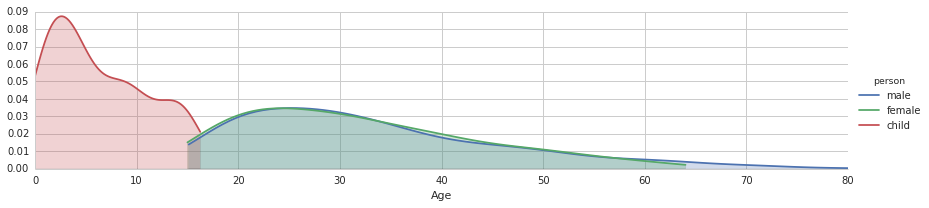

In [73]:
fig = sns.FacetGrid(titanic_df,hue='person',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

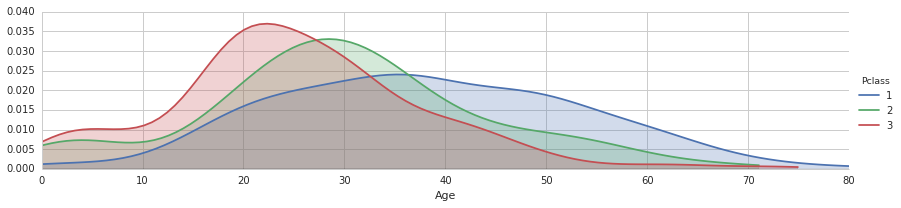

In [74]:
fig = sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

## what deck were the passengers on and how does it relate to the class ?

In [75]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male


In [76]:
deck = titanic_df['Cabin'].dropna()

In [77]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

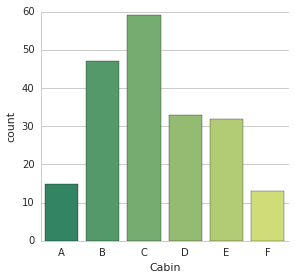

In [107]:
levels = []

for level in deck:
    levels.append(level[0])
    
cabin_df = DataFrame(levels)
cabin_df.columns=['Cabin']
sns.factorplot('Cabin',data= cabin_df,kind='count',palette='summer',order = ['A','B','C','D','E','F'])


### The cabin T is not necessary thus we redefine the data frame as below

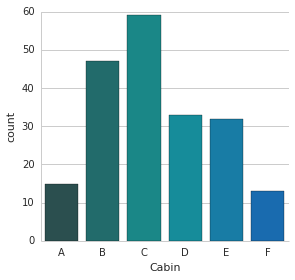

In [106]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']
sns.factorplot('Cabin',data= cabin_df,kind='count',palette = 'winter_d',order=['A','B','C','D','E','F'])

In [108]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male


### As we see in the description of the dataset on kaggle embarked actually marks the port from where people embarked

embarked        Port of Embarkation

(C = Cherbourg; Q = Queenstown; S = Southampton)


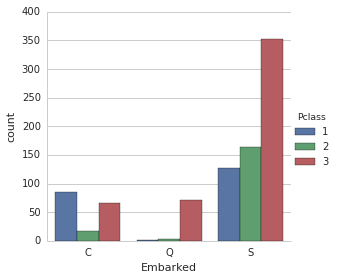

In [114]:
sns.factorplot('Embarked',data=titanic_df,kind='count',hue='Pclass',order=['C','Q','S'])

From the above one can visualize how many pasengers got into the three classes and from various cities. It seems that the people from Queenstown mostly embarked on the 3rd class. This may be due to the economic condition of Queenstown

#### The next is to see who is alone and and who is with family

In [117]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C,child


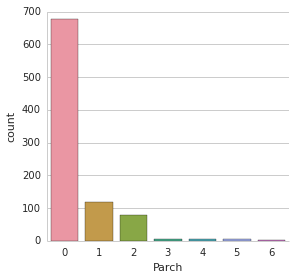

In [116]:
sns.factorplot('Parch',data=titanic_df, kind = 'count')

In [132]:
titanic_df['Alone'] =  titanic_df.Parch + titanic_df.SibSp

In [133]:
titanic_df['Alone'].head()

0    1
1    1
2    0
3    1
4    0
Name: Alone, dtype: int64

In [134]:
titanic_df['Alone'].loc[titanic_df['Alone'] > 0]= 'with family'
titanic_df['Alone'].loc[titanic_df['Alone'] ==0]= 'alone'

In [135]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male,with family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,with family
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female,alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,with family
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male,alone


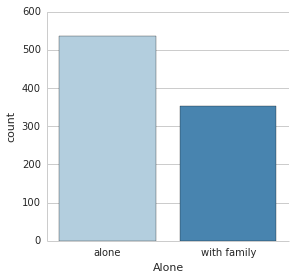

In [138]:
sns.factorplot('Alone',data= titanic_df,kind='count',palette='Blues',order=['alone','with family'])

## What factors help someone help survive sinking or crash

In [139]:
titanic_df['Surviver'] = titanic_df.Survived.map({0:'no',1:'yes'})

In [140]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Surviver
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male,with family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,with family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female,alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,with family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male,alone,no


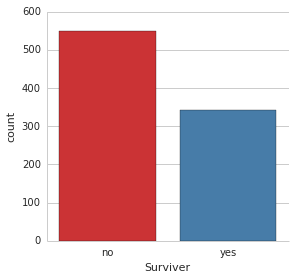

In [143]:
sns.factorplot('Surviver',data=titanic_df,kind='count',palette='Set1')

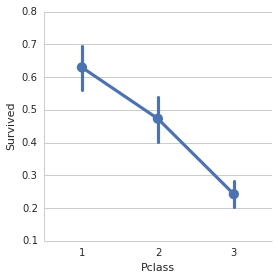

In [144]:
sns.factorplot('Pclass','Survived',data=titanic_df)

To check if there is a relation between the class and the surviver rate the above plot is used. Here we see that in general the survival rate in the 3rd class is substantially lower

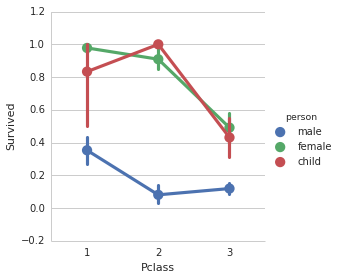

In [145]:
sns.factorplot('Pclass','Survived',hue='person',data=titanic_df)

Looking at the plot it can be concluded that being in the 3rd class or being a male is not favourable. Specially it can be seen that being a male and surviving is less favourable. These can be further visualized as follows

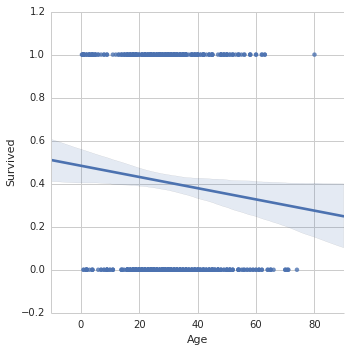

In [148]:
sns.lmplot('Age','Survived',data=titanic_df)

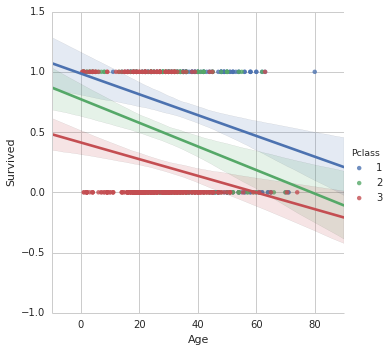

In [149]:
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df)

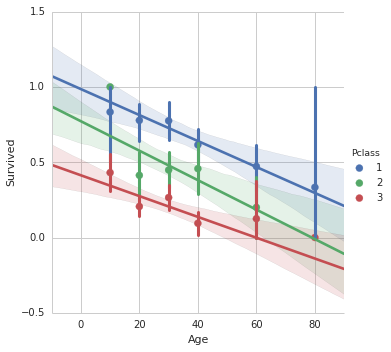

In [150]:
generations = [10,20,30,40,60,80]
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,x_bins=generations)

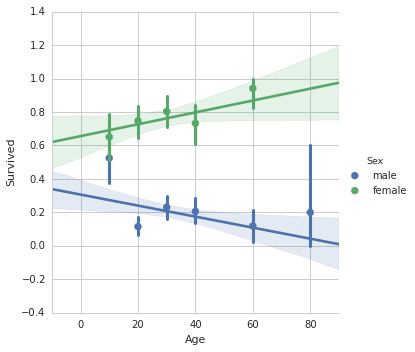

In [151]:
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,x_bins=generations)

### Checking the effect of being with the family or alone suggests that the survival rate is still comparably higher if one is with family

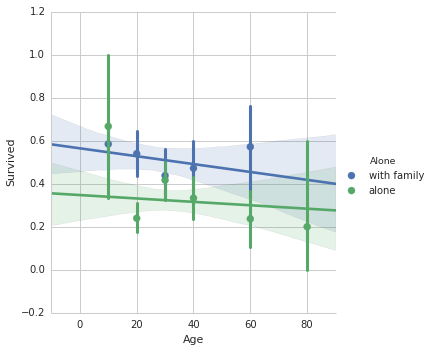

In [154]:

sns.lmplot('Age','Survived',hue='Alone',data= titanic_df,x_bins=generations)

1) The number of males in the ship is much larger than the number of females and children

2) The number of people boarding from Queenstown embark on 3rd class

3) The survival rate in 3rd class is much lower 

4) The survival rate of females is in general a linear function of age whereas, for males it is also a linear function    but the survival rate decreases with age.

5) From the analysis above it can be seen that males in general have a low survival rate. Where as if one has a family    member his survival rate is much higher. 


This gives a general overview of the dataset and answers particular very simple questions and provides visualization